# Introduction to Probability

## Learning aims

- know basic concepts such as outcome, event, probability, probability distribution, experiment, and conditional probability
- list some probability distributions like binomial, uniform
- connect basic concepts to code that simulates random processes
- explore data through plotting and calculation of simple probabilities
- model simple toy problems, specifically using Bernoulli and binomial distributions, and write code that simulates such simple problems.

## A quick question before we start...

Link: https://www.menti.com/4ii97w7bfi

Code for menti.com: 3269 1977

## Interactive session

This notebook can be run in the browser using Google Colab:

https://tinyurl.com/statsforcs

In [2]:
import random
import numpy as np

# Auto-setup for Colab
import os

if 'google.colab' in str(get_ipython()):
    if os.path.exists('stats_for_cs'):
        !rm -rf stats_for_cs
    !git clone https://github.com/uio-bmi/stats_for_cs.git
    %cd stats_for_cs

from util import plot_event_probabilities, coin1, coin2

## Example: a coin toss

In [3]:
def coin():
    return random.sample(['head', 'tail'], 1)[0]

coin()

'head'

In [4]:
# TODO: write the same simulation here, but instead of tossing a coin, the simulation should roll a 6-sided die

# live-coded

def die():
    return random.sample([1, 2, 3, 4, 5, 6], 1)[0]

die()


2

## Probability

Probability of getting a head when tossing a coin:
  
if we toss a coin many times, how often we get head
  


In [5]:
n_throws = 100
throws = [coin() for _ in range(n_throws)]

print(f"Throws:\n{throws}\n")
print(f"How often we get head: {round(throws.count('head') / n_throws * 100)}% of time")
print(f"How often we get tail: {round(throws.count('tail') / n_throws * 100)}% of time")

Throws:
['tail', 'tail', 'tail', 'tail', 'head', 'tail', 'head', 'head', 'head', 'tail', 'tail', 'tail', 'head', 'tail', 'head', 'head', 'head', 'head', 'head', 'tail', 'tail', 'tail', 'tail', 'tail', 'tail', 'tail', 'head', 'tail', 'head', 'tail', 'head', 'tail', 'tail', 'head', 'head', 'tail', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'tail', 'tail', 'tail', 'head', 'head', 'tail', 'head', 'tail', 'tail', 'head', 'head', 'head', 'head', 'head', 'tail', 'tail', 'head', 'head', 'tail', 'head', 'head', 'tail', 'tail', 'head', 'tail', 'tail', 'head', 'tail', 'tail', 'tail', 'tail', 'head', 'tail', 'tail', 'head', 'tail', 'head', 'tail', 'tail', 'head', 'head', 'head', 'tail', 'tail', 'head', 'tail', 'head', 'head', 'head', 'head', 'head', 'tail', 'tail', 'tail', 'tail', 'head', 'tail']

How often we get head: 49% of time
How often we get tail: 51% of time


In [6]:
throws = [coin2() for _ in range(n_throws)]

print(f"Throws:\n{throws}\n")
print(f"How often we get head: {round(throws.count('head') / n_throws * 100)}% of time")
print(f"How often we get tail: {round(throws.count('tail') / n_throws * 100)}% of time")

Throws:
['tail', 'head', 'head', 'tail', 'tail', 'head', 'head', 'head', 'tail', 'tail', 'tail', 'head', 'tail', 'head', 'tail', 'head', 'tail', 'head', 'tail', 'head', 'head', 'head', 'head', 'head', 'head', 'tail', 'head', 'head', 'head', 'head', 'head', 'tail', 'head', 'head', 'head', 'tail', 'head', 'head', 'head', 'head', 'head', 'tail', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'tail', 'tail', 'head', 'tail', 'head', 'head', 'head', 'head', 'tail', 'head', 'head', 'head', 'tail', 'head', 'head', 'head', 'head', 'tail', 'tail', 'head', 'head', 'tail', 'tail', 'head', 'tail', 'head', 'tail', 'head', 'head', 'head', 'head', 'tail', 'head', 'head', 'tail', 'head', 'tail', 'head', 'head', 'head', 'tail', 'tail', 'head', 'head', 'tail', 'tail', 'head', 'head']

How often we get head: 68% of time
How often we get tail: 32% of time


## Example: weighted coin

What happened with coin2?

In [8]:
import inspect
print(inspect.getsource(coin2))

def coin2():
    return random.sample(['head', 'head', 'tail'], 1)[0]



coin2 is such that it's twice as likely to get a head as it is to get a tail.

In [51]:
# Going back to the original coin, it could have been implemented this way:

def coin3():
    random_val_between_0_and_1 = random.random()
    print(random_val_between_0_and_1)
    return 'head' if random_val_between_0_and_1 < 0.5 else 'tail'

coin3()

0.1199093854357336


'head'

Write a function to simulate a weighted coin with explicitly provided probability of getting a head.

In [48]:
# TODO: write a function to simulate a weighted coin with a probability of getting a head of 0.3

def weighted_coin(p_head=0.3):
    
    # live coded:

    outcome = 'head' if random.random() < p_head else 'tail'
    return outcome

weighted_coin()

'tail'

## Outcomes and experiments

If we toss a coin, two things can happen:

  - we can get a head, or
  - we can get a tail.

In this setting, head and tail are possible **outcomes** of tossing a coin.

Tossing a coin is then called an **experiment**.

More formally, an experiment is a random process that produces exactly one possible outcome.

## Sample space

A set of all possible outcomes is called a **sample space**.

For coin toss: sample space = {head, tail}

Elements of the sample space should be distinct and mutually exclusive --> unique outcome of an experiment

The sample space has to be collectively exhaustive: no matter the outcome of an experiment, the outcome has to be a part of the sample space

For coin toss: both head and tail need to be in the sample space

## Sample space

A set of **all possible outcomes** is called a **sample space**.

In [52]:
def coin():
    sample_space = ['head', 'tail'] # sample space with 2 possible outcomes
    outcome = random.sample(sample_space, 1)[0]
    return outcome

obtained_outcome = coin()

print(f"Outcome: {obtained_outcome}")
print(f"Valid outcome: {obtained_outcome in ['head', 'tail']}")

Outcome: head
Valid outcome: True


## Example: multiple coin tosses 

If we toss a coin 3 times, what is the probability that we get exactly 2 heads?

What are the possible outcomes here?

In [53]:
def toss_coin_n_times(n):

    # TODO: code this function

    # live-coded:
    
    return tuple([coin() for _ in range(n)])

toss_coin_n_times(n=3)

('tail', 'head', 'tail')

How can we now estimate the probabilities of events like getting exactly 2 heads? What would simulation look like?

## Event

An event A is a set of possible outcomes.

The probability of an event A, denoted P(A), describes the knowledge or belief about the collective "likelihood" of the elements in A.

Coin toss example:

Outcomes: H, T

Examples of events: {H}, {T}

## Event

Toss a coin 3 times:

Outcomes: HHH, HHT, HTH, HTT, THH, THT, TTH, TTT

Events: A = {exactly 2 heads occur} = {HHT, HTH, THH}

In [54]:
def estimate_probability_of_getting_2_heads_from_3_tosses(num_experiments: int):

    # live-coded?
    
    got_2_heads_count = 0
    for _ in range(num_experiments):
        outcome = toss_coin_n_times(n=3)
        got_2_heads_count += int(outcome.count('head') == 2)

    probability_of_2_heads = got_2_heads_count / num_experiments
    return probability_of_2_heads

estimate_probability_of_getting_2_heads_from_3_tosses(num_experiments=1000)

0.388

## Probability distribution

A probability distribution gives the probability of the occurrence of different possible outcomes:

- If we toss a coin, what is the probability that we get a head: P(head), and what is the probability that we get a tail: P(tail)

- If we toss a coin 3 times, what is the probability that we get 0 heads: P(H0), 1 head: P(H1), 2 heads: P(H2), or 3 heads: P(H3)

The probability of the entire sample space is 1.

In [55]:
from itertools import product

def estimate_probability_distribution(n_tosses, num_experiments):
    
    # TODO: write code here to estimate how often we get each of the events

    # live-coded:
    events = [f'H{i}' for i in range(n_tosses+1)]
    all_possible_outcomes = list(product(['head', 'tail'], repeat=n_tosses))
    
    outcome_to_event = {possible_outcome: events[possible_outcome.count('head')] 
                        for possible_outcome in all_possible_outcomes}
    
    event_counts = {event: 0 for event in events}

    for experiment in range(num_experiments):
        outcome = toss_coin_n_times(n=n_tosses)
        event = outcome_to_event[outcome]
        event_counts[event] += 1

    prob_dist = {event: count / num_experiments for event, count in event_counts.items()}
    
    return prob_dist, all_possible_outcomes, events

prob_dist, all_possible_outcomes, events = estimate_probability_distribution(n_tosses=3, num_experiments=100)

print(f"Outcomes:\n{all_possible_outcomes}\n")

print(f"Events:\n{events}\n")

print(f"Probability distribution: {prob_dist}")

Outcomes:
[('head', 'head', 'head'), ('head', 'head', 'tail'), ('head', 'tail', 'head'), ('head', 'tail', 'tail'), ('tail', 'head', 'head'), ('tail', 'head', 'tail'), ('tail', 'tail', 'head'), ('tail', 'tail', 'tail')]

Events:
['H0', 'H1', 'H2', 'H3']

Probability distribution: {'H0': 0.07, 'H1': 0.43, 'H2': 0.36, 'H3': 0.14}


This way of obtaining probability distributions through simulations is called Monte Carlo simulation.

We can also show the results of the simulation graphically:

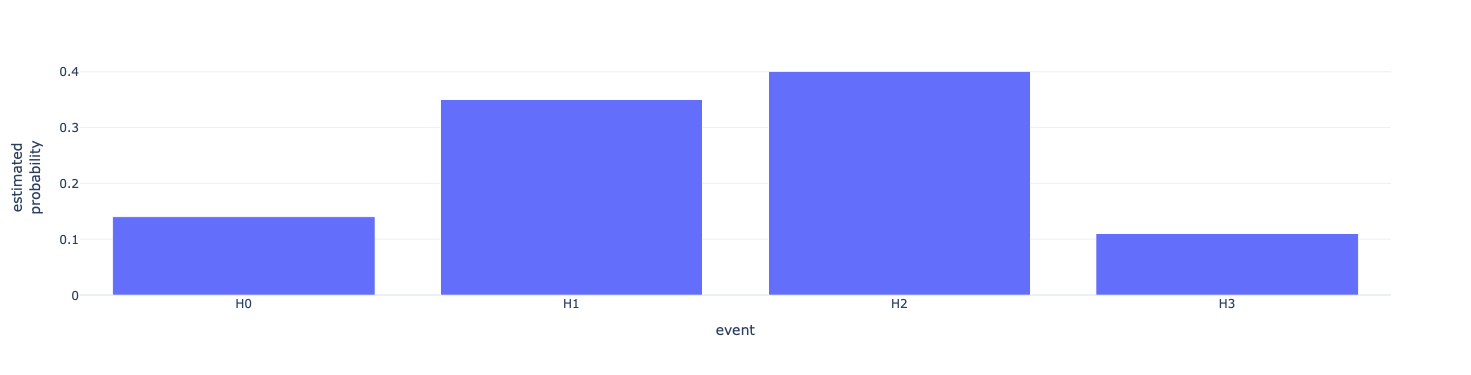

In [31]:
n = 3
num_experiments = 100

prob_dist, _, _ = estimate_event_probabilities(n, num_experiments)

plot_event_probabilities(prob_dist)

### Example: the probability of obtaining at least 1 head

What is the probability of obtaining at least 1 head from 3 tosses? Write the code to estimate it.

In [33]:
def estimate_probability_of_getting_at_least_1_head_from_3_tosses(num_experiments: int):

    # live-coded?
    
    got_at_least_1_head_count = 0
    for _ in range(num_experiments):
        outcome = toss_coin_n_times(n=3)
        got_at_least_1_head_count += int(outcome.count('head') >= 2)

    probability_of_at_least_1_head = got_at_least_1_head_count / num_experiments
    return probability_of_at_least_1_head

estimate_probability_of_getting_at_least_1_head_from_3_tosses(num_experiments=1000)

0.508

Now write the code to estimate the probability of getting at least 1 head, at least 2 heads, and at least 3 heads.

In [35]:
def estimate_probability_of_at_least_m_heads(num_experiments: int):
    toss_count = 3
    got_at_least_n_heads_counts = {i: 0 for i in range(toss_count+1)}
    for _ in range(num_experiments):
        outcome = toss_coin_n_times(n=toss_count)
        head_count = outcome.count('head')
        for at_least_n in got_at_least_n_heads_counts.keys():
            if at_least_n >= head_count:
                got_at_least_n_heads_counts[at_least_n] += 1

    probabilities = {at_least_n: count / num_experiments for at_least_n, count in got_at_least_n_heads_counts.items()}
    return probabilities

print(estimate_probability_of_at_least_m_heads(num_experiments=1000))

{0: 0.111, 1: 0.491, 2: 0.877, 3: 1.0}


One example output of the previous function: {0: 0.111, 1: 0.491, 2: 0.877, 3: 1.0} - **this is not a valid probability distribution!**

Why?

## Outcome vs event

"At least n heads" is an **event** - it contains several outcomes: (head, tail, head) and (head, tail, tail) are two different outcomes, but the same event of "at least 1 head".

"At least n heads" **cannot be an outcome**, because it is not exclusive: outcome (head, tail, head) belongs to both "at least 1" and "at least 2" heads events.

## Outcome vs event

Outcome and events are two levels of abstraction used to describe a random process.

Outcomes are elementary and enumerate all the different possibilities. Probabilities of all outcomes sum to 1, as one outcome has to occur as a result of an experiment.

Events are defined as sets of outcomes that are of interest. Probabilities of events are the sum of probabilities of all outcomes that are part of the event.

## Probability axioms

Probability axioms hold for any probability by definition:

- Probability of any event A is always nonnegative:
  P(A) >= 0
- For two events A and B that do not overlap (disjoint events), the probability of both happening is the sum of their individual probabilities:
  P(A U B) = P(A) + P(B)
- The probability of the entire sample space is equal to 1.

## Going back to the betting example

If we throw a fair coin 10 times, what is the probability that we get 5 heads and 5 tails? Write the code to simulate this experiment and empirically estimate its probability.

Some thinking points:
- What is the event in this case?
- What are possible outcomes?

In [64]:
# TODO: Write the code here and estimate the probability of obtaining exactly 5 heads and 5 tails in 10 coin tosses

# live-coded:
event_probs, outcomes, events = estimate_probability_distribution(n_tosses=10, num_experiments=10000)

print(f"Outcome examples:\n{outcomes[:3]}\n")
print(f"Number of different outcomes: {len(outcomes)}")
print(f"Events: {events}")
print("Probabilities of different events:")
print(event_probs)

print(event_probs['H5'])

Outcome examples:
[('head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head'), ('head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'tail'), ('head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'tail', 'head')]

Number of different outcomes: 1024
Events: ['H0', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10']
Probabilities of different events:
{'H0': 0.0007, 'H1': 0.0111, 'H2': 0.0452, 'H3': 0.1203, 'H4': 0.2037, 'H5': 0.2441, 'H6': 0.2083, 'H7': 0.1134, 'H8': 0.0422, 'H9': 0.01, 'H10': 0.001}
0.2441


## Back to Menti

Link: https://www.menti.com/4ii97w7bfi

Code for menti.com: 3269 1977

## Empirical and analytical solutions

Through simulations, we can estimate the probability of an event.

We can also often mathematically describe the probability distribution and compute it using a formula.

However, in some cases, we either do not know the formula or the distribution would be too hard to compute, then we go back to (Monte Carlo) simulations.

## Empirical and analytical solutions

**Probability mass function**: a function that gives the probability of an outcome or an event (e.g., the probability of getting 2 heads in 3 coin tosses).

Some random processes occur in many different situations. For example, we can toss a coin to get a head/tail, a student can take an exam where they pass/fail, or a diagnostic test that results in a positive/negative diagnosis - all of these have a specific "type of randomness".

## Bernoulli distribution

This distribution models any yes/no (1/0) question where yes (1) is chosen with probability p.

Example: a coin toss comes up with a head with probability p and a tail with probability 1-p.

<div>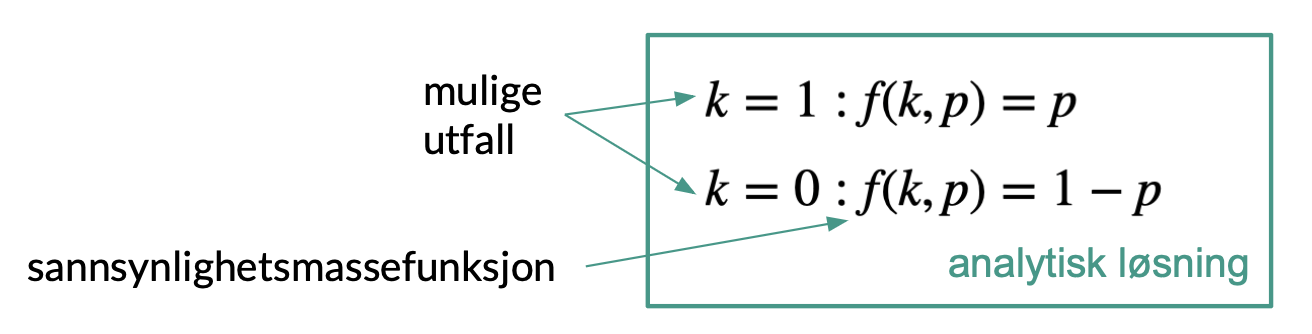</div>

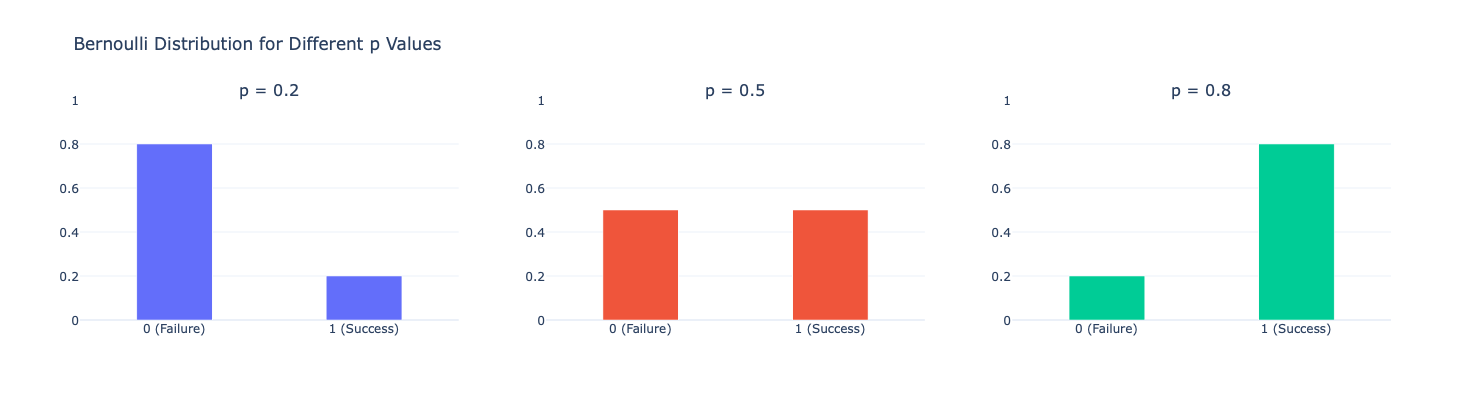

In [8]:
from util import plot_bernoulli_examples

plot_bernoulli_examples()

## Binomial distribution

Binomial distribution describes the number of successes k (e.g., getting heads) in a sequence of n trials (e.g., in n coin throws) where the probability of success in each trial is p.

Probability of getting k successes in n independent trials if the probability of success is p can be computed using the following probability mass function:

<div>
    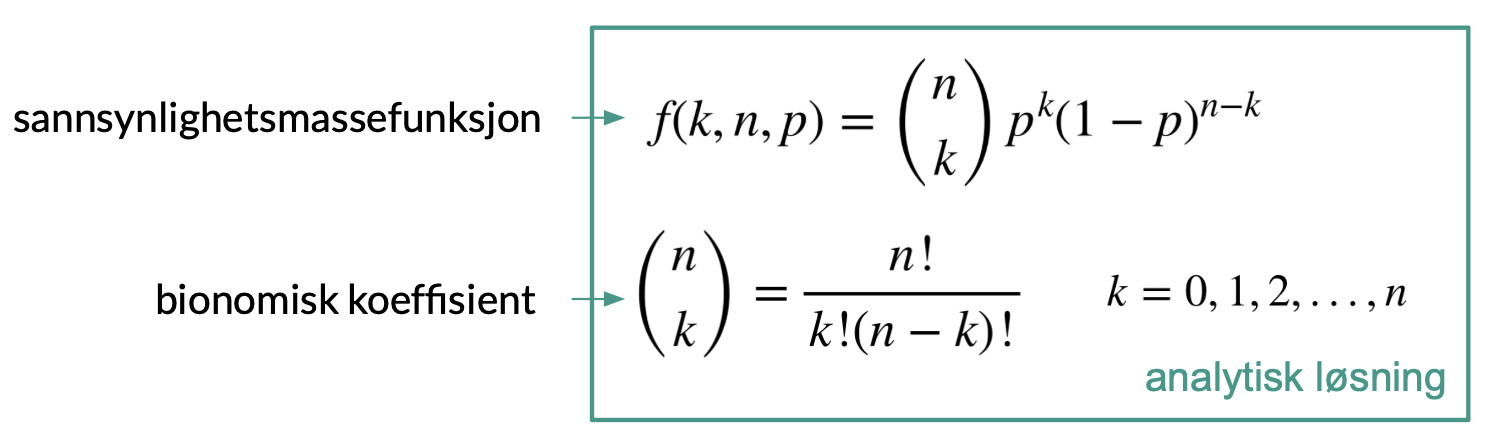
</div>

In [ ]:
# what is the probability of 

## Example 1

You are rolling a die three times. What is the probability that the sum of the sides is less than 12?

In [ ]:
def estimate_probability_of_sum(target_sum, num_experiments):
    
    # TODO: estimate the probability

    # live-coded:
    events = ['less_than_target', 'greater_equal_target']
    prob_dist = {event: 0 for event in events}
    for experiment in range(num_experiments):
        outcome = [die() for _ in range(3)]
        if sum(outcome) < target_sum:
            prob_dist['less_than_target'] += 1
        else:
            prob_dist['greater_equal_target'] += 1

    prob_dist = {event: count / num_experiments for event, count in prob_dist.items()}

    return prob_dist
            

estimate_probability_of_sum(12, 100)

## Example 2

Three card players play a series of matches. The probability that player 1 will win any game is 30%, the probability that player 2 will win is 50% and the probability that the third player wins is 20%. If they play 6 games, what is the probability that player 1 wins at least 2 games?


In [ ]:
def estimate_winner_probability(player1_p, player2_p, player3_p, num_games, num_experiments):
    
    # TODO: estimate the probability

    # live-coded:

    events = ['player1wins2+', 'player1wins1-']
    prob_dist = {event: 0 for event in events}
    
    for experiment in range(num_experiments):
        player1_wins = 0
        for game in range(num_games):
            player1_wins += random.random() < player1_p

        if player1_wins >= 2:
            prob_dist['player1wins2+'] += 1
        else:
            prob_dist['player1wins1-'] += 1

    prob_dist = {event: count / num_experiments for event, count in prob_dist.items()}

    return prob_dist
        

estimate_winner_probability(0.3, 0.5, 0.2, 6, 10000)
    

# Different distributions

In Session 1, we simulated tossing a coin 3 times to get the probability of getting different number of heads. This was plotted as a histogram - a way to connect the number of heads (X) with the frequency of obtaining them (Y).


In [ ]:
def toss_coin_n_times(p_head, n):    
    return ['H' if random.random() <= p_head else 'T' for _ in range(n)]

def simulate_event_probabilities(p_head, n, num_experiments):
    event_counts = {i: 0 for i in range(n+1)}
    
    for experiment in range(num_experiments):
        outcome = toss_coin_n_times(p_head, n)
        event_counts[outcome.count('H')] += 1
        
    prob_dist = {f'H{event}': count / num_experiments for event, count in event_counts.items()}
    
    return prob_dist

event_probabilities = simulate_event_probabilities(p_head=0.5, n=3, num_experiments=1000)
print(event_probabilities)

plot_event_probabilities(event_probabilities)

This can also be computed using a formula of binomial distribution (probability of getting k successes in n independent trials when the probability of success is p):

In [ ]:
import math

def head_count_prob(p_head, n, head_count):
    return math.factorial(n) / (math.factorial(head_count) * math.factorial(n - head_count)) * (p_head**head_count) * ((1-p_head)**(n-head_count))

event_probabilities_from_formula = {
    f'H{head_count}': head_count_prob(p_head=0.5, n=3, head_count=head_count) for head_count in range(4)
}

print(event_probabilities_from_formula)
plot_event_probabilities(event_probabilities_from_formula)

Or using a library function that implements the formula:


In [ ]:
from scipy.stats import binom

def compute_event_probabilities_from_formula(p_head, n):
    return {
        f'H{head_count}': round(binom.pmf(k=head_count, n=n, p=p_head), 4) for head_count in range(n+1)
    }

event_probabilities_from_formula = compute_event_probabilities_from_formula(p_head=0.5, n=3)

print(event_probabilities_from_formula)
plot_event_probabilities(event_probabilities_from_formula)

And if we combine the plots:


In [ ]:
from util import plot_probability_comparison
    
p_head, n, num_experiments = 0.5, 3, 1000
event_probabilities_sim = simulate_event_probabilities(p_head, n, num_experiments)
event_probabilities_formula = compute_event_probabilities_from_formula(p_head, n)

plot_probability_comparison(event_probabilities_sim, event_probabilities_formula)

See the slides 38-41 in the presentation.

## What happens if we toss a coin many times: approaching continuous distributions


In [ ]:
p_head, n, num_experiments = 0.5, 20, 1000
event_probabilities_sim = simulate_event_probabilities(p_head, n, num_experiments)
plot_event_probabilities(event_probabilities_sim)

See the slides 42-48 in the presentation.

## Example 3: Monopoly


In the game of Monopoly, one moves one's marker around a board containing 40 fields, by throwing a pair of dice every turn. What is the probability of finishing your first round on your fifth turn?

<img src="https://images.unsplash.com/photo-1640461470346-c8b56497850a?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1674&q=80" style="height:280px; float: left; margin-top: 10px; margin-right: 10px" />

Alternatively:

What is the probability that the sum of values passes 40 after drawing a sample from a pair of (2) randint(1,6) calls exactly 5 times?


Write a code to simulate this and estimate the probability.


In [ ]:
from random import randint

# TODO: write the code here

# live-coded:

def estimate_monopoly_probability(num_experiments):
    successes = 0

    for experiment in range(num_experiments):
        outcome = [[die() for _ in range(2)] for _ in range(5)]
        value = sum(sum(dice) for dice in outcome)
        if value > 40:
            successes += 1

    return successes / num_experiments

estimate_monopoly_probability(1000)

See the slides 49-50 in the presentation.

## Example 4: computing the probability of a letter in a text


In [ ]:
import re

original_text = """To be, or not to be, that is the question, Whether 'tis nobler in the mind to suffer The slings and arrows of outrageous fortune,Or to take arms against a sea of troubles,And by opposing end them? To die: to sleep;No more; and by a sleep to say we endThe heart-ache and the thousand natural shocksThat flesh is heir to, 'tis a consummationDevoutly to be wish'd. To die, to sleep;To sleep: perchance to dream: ay, there's the rub;For in that sleep of death what dreams may comeWhen we have shuffled off this mortal coil,Must give us pause: there's the respectThat makes calamity of so long life;For who would bear the whips and scorns of time,The oppressor's wrong, the proud man's contumely,The pangs of despised love, the law's delay,The insolence of office and the spurnsThat patient merit of the unworthy takes,When he himself might his quietus makeWith a bare bodkin? who would fardels bear,To grunt and sweat under a weary life,But that the dread of something after death,The undiscover'd country from whose bournNo traveller returns, puzzles the willAnd makes us rather bear those ills we haveThan fly to others that we know not of?Thus conscience does make cowards of us all;And thus the native hue of resolutionIs sicklied o'er with the pale cast of thought,And enterprises of great pith and momentWith this regard their currents turn awry,And lose the name of action.--Soft you now!The fair Ophelia! Nymph, in thy orisonsBe all my sins remember'd."""
text = re.sub(r"[\.\,\:\' \;\n\-\?\!]*", "", original_text).lower()

# print(original_text)
# print(text)

def compute_marginal_probability(letter, text):
    probability = None
    
    # TODO: write code here to estimate P(letter) in the given text

    # live-coded
    count = text.count(letter)
    probability = count / len(text)
        
    return probability

def compute_conditional_probability(letter, previous_letter, text):
    cond_probability = None
    
    # TODO: write code here to estimate P(letter | previous_letter) in the text
    
    # live-coded
    count_previous_letter = text.count(previous_letter)
    count_both_letters = text.count(previous_letter + letter)

    cond_probability = count_both_letters / count_previous_letter
        
    return cond_probability

print(compute_marginal_probability("a", text))

print(compute_conditional_probability("a", "h", text))

## Example 5

We toss a fair coin 3 times. What is the probability that more heads than tails come up if the first toss is head?

In [ ]:
def estimate_more_heads_probability(num_experiments):

    # TODO: simulate and estimate the probability of getting more heads given that first toss is a head

    # live-coded:

    successes = 0
    head_first = 0
    
    for experiment in range(num_experiments):
        outcome = [coin() for _ in range(3)]
        if outcome[0] == 'head':
            head_first += 1
            if outcome.count('head') > outcome.count('tail'):
                successes += 1
    return successes / head_first
    

estimate_more_heads_probability(1000)
    